In [1]:
import torch
import numpy as np, seaborn as sns, pandas as np, matplotlib.pyplot as plt
import os, sys
sys.path.append('../../../')
sys.path.append('../../../Examples/TrackML_Quickstart')
from Pipelines.TrackML_Example_Dev.LightningModules.Embedding.Models.layerless_embedding import LayerlessEmbedding

from utils import plot_true_graph, get_training_metrics, plot_training_metrics, plot_neighbor_performance, plot_predicted_graph, plot_track_lengths, plot_edge_performance, plot_graph_sizes
DATASET_PATH = '../datasets/metric_learning_processed/train/'
MODEL_PATH = '/global/cfs/cdirs/m3443/usr/pmtuan/Tracking-ML-Exa.TrkX/Examples/TrackML_Full/hpc_ckpt_5.ckpt'

/global/cfs/cdirs/m3443/usr/pmtuan/conda/exatrkx_hsf/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading BokehJS ...

In [2]:
file_list = os.listdir(DATASET_PATH)
data = torch.load(os.path.join(DATASET_PATH, file_list[0]))
data

Data(x=[102267, 3], pid=[102267], modules=[102267], event_file='/global/cfs/cdirs/m3443/data/trackml-codalab/train_all/event000023271', hid=[102267], pt=[102267], weights=[75955], modulewise_true_edges=[2, 75955], cell_data=[102267, 9], signal_true_edges=[2, 9902], edge_index=[2, 647225], y=[647225])

In [3]:
model = LayerlessEmbedding.load_from_checkpoint(MODEL_PATH)
model.hparams['input_dir'] = '../datasets/full_data/'
model.hparams['n_events'] = 100
model.setup(stage='fit')

In [11]:
plot_neighbor_performance(model)

In [12]:
plot_predicted_graph(model)

In [13]:
plot_track_lengths(model)

100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


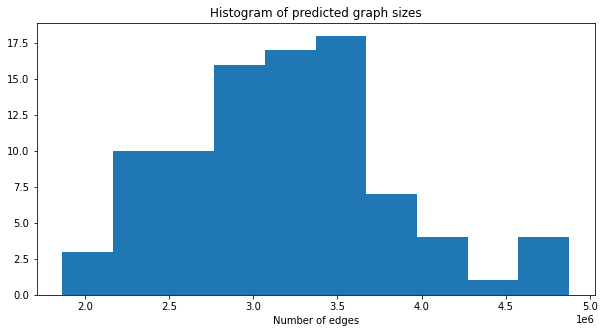

In [17]:
model.hparams['n_events'] = 100
model.setup(stage='fit')
plot_graph_sizes(model)

In [26]:
signal_edges = data.modulewise_true_edges[:, data.pt[data.modulewise_true_edges[0]] > 1 ]

In [28]:
signal_edges.shape

torch.Size([2, 9926])

In [30]:
data.pid.unique().shape

torch.Size([8504])